# Now we build ML model on the diabetes dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
diabetes=pd.read_csv('diabetes_prediction_dataset.csv')

In [4]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [76]:
for i in diabetes:
    print(i)
    print(diabetes[i].unique())

gender
[0 1 2]
age
[80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25 33 16 61 31  8 49 39 65 14 70 48 51
 71 64 63 52 10 35 23  1]
hypertension
[0 1]
heart_disease
[1 0]
smoking_history
[0 1 2 3 4 5]
bmi
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes
[0 1]


In [5]:
diabetes.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
diabetes.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


About Dataset The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The dataset contains health-related information of 100,000 individuals, including gender, age, hypertension, heart disease, smoking history, BMI, HbA1c level, blood glucose level, and diabetes status. All columns have non-null entries, making it suitable for predictive analysis tasks.


In [10]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [11]:
diabetes=diabetes[diabetes['age']>1]

In [12]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [13]:
diabetes['age']=diabetes['age'].astype(int)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99006 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99006 non-null  object 
 1   age                  99006 non-null  int32  
 2   hypertension         99006 non-null  int64  
 3   heart_disease        99006 non-null  int64  
 4   smoking_history      99006 non-null  object 
 5   bmi                  99006 non-null  float64
 6   HbA1c_level          99006 non-null  float64
 7   blood_glucose_level  99006 non-null  int64  
 8   diabetes             99006 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 7.2+ MB


In [14]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99006.000000,99006.000000,99006.000000,99006.000000,99006.000000,99006.000000,99006.000000
mean,42.295245,0.075601,0.039816,27.420133,5.529184,138.114720,0.085853
std,22.253794,0.264361,0.195527,6.583384,1.071387,40.765272,0.280149
min,1.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.782500,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.000000,0.000000,29.640000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# check null values

In [15]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### There is no null values present in this dataset

In [16]:
for i in diabetes:
    print(i)
    print(diabetes[i].unique())


gender
['Female' 'Male' 'Other']
age
[80 54 28 36 76 20 44 79 42 32 53 78 67 15 37 40  5 69 72  4 30 45 43 50
 41 26 34 73 77 66 29 60 38  3 57 74 19 46 21 59 27 13 56  2  7 11  6 55
  9 62 47 12 68 75 22 58 18 24 17 25 33 16 61 31  8 49 39 65 14 70 48 51
 71 64 63 52 10 35 23  1]
hypertension
[0 1]
heart_disease
[1 0]
smoking_history
['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi
[25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level
[6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level
[140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240]
diabetes
[0 1]


# separting categorical and numerical columns

In [17]:
cat_col=diabetes.select_dtypes(object)
cat_col

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current
...,...,...
99995,Female,No Info
99996,Female,No Info
99997,Male,former
99998,Female,never


In [18]:
num_col=diabetes.select_dtypes(['int','float'])
num_col

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0
2,28,0,0,27.32,5.7,158,0
3,36,0,0,23.45,5.0,155,0
4,76,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80,0,0,27.32,6.2,90,0
99996,2,0,0,17.37,6.5,100,0
99997,66,0,0,27.83,5.7,155,0
99998,24,0,0,35.42,4.0,100,0


# now perform EDA on diabetes dataset


# distribution of num data

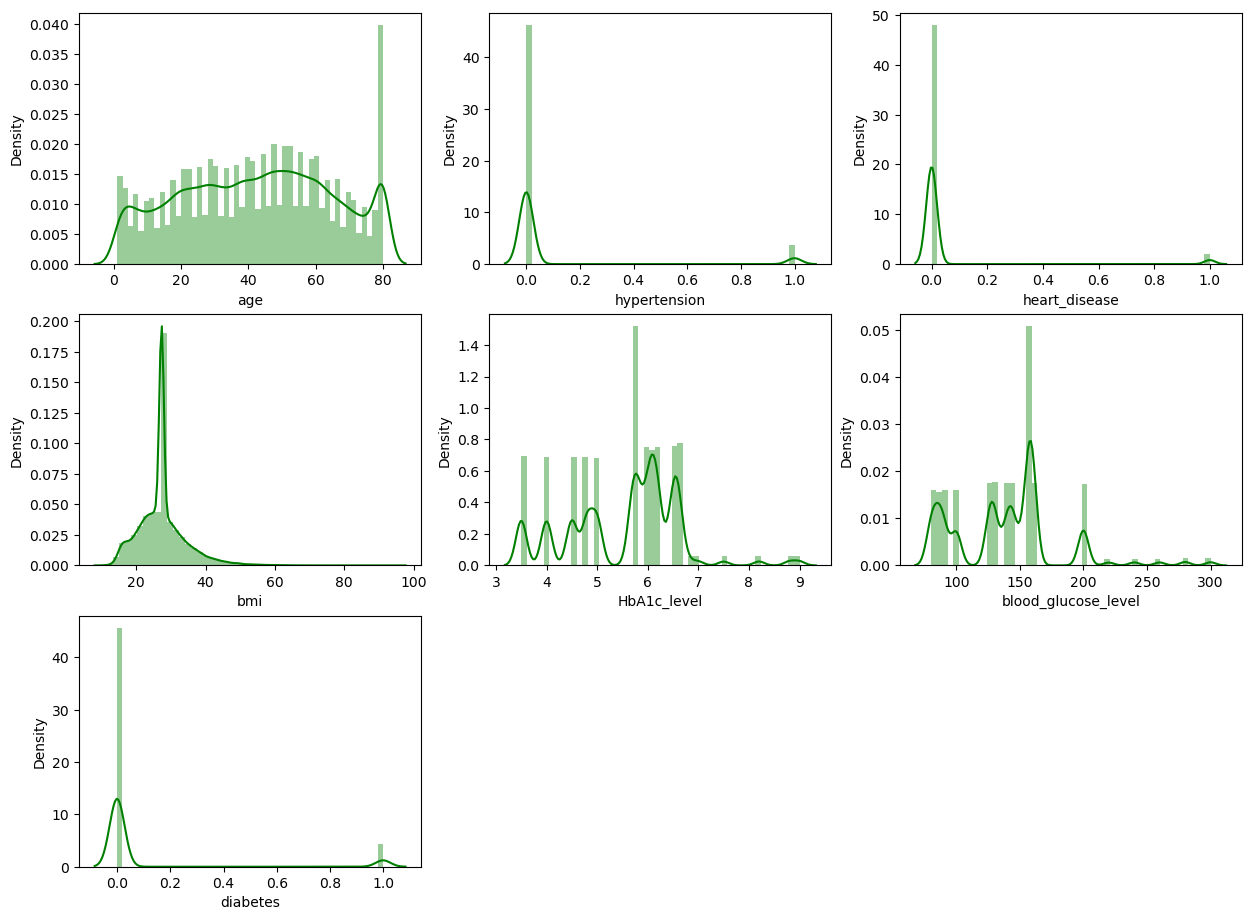

In [19]:
plt.figure(figsize= (15,15))
count=1
for i in num_col:
    
    plt.subplot(4,3,count)
    sns.distplot(num_col[i],color='green')
    count+=1
plt.show()

In [20]:
diabetes.nunique()

gender                    3
age                      80
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4208
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

<AxesSubplot:ylabel='gender'>

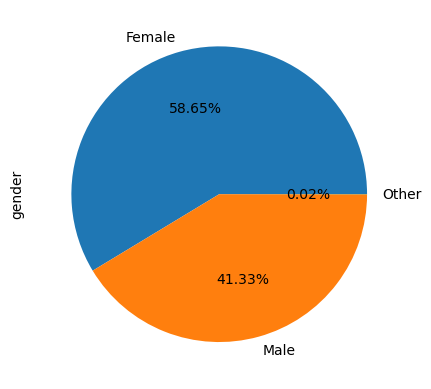

In [21]:
diabetes['gender'].value_counts().plot(kind='pie',autopct= "%.2f%%")


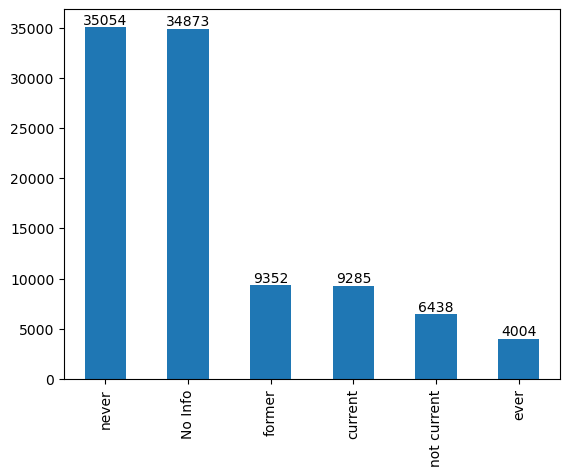

In [22]:
diabetes['smoking_history'].value_counts().plot(kind='bar')
value_counts = diabetes['smoking_history'].value_counts()


for index, value in enumerate(value_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

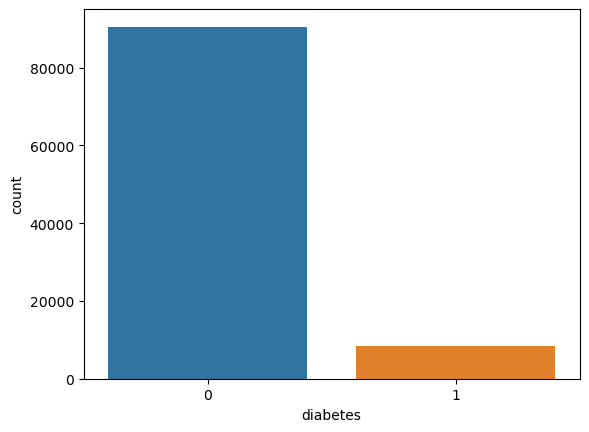

In [23]:
sns.countplot(diabetes['diabetes'])

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

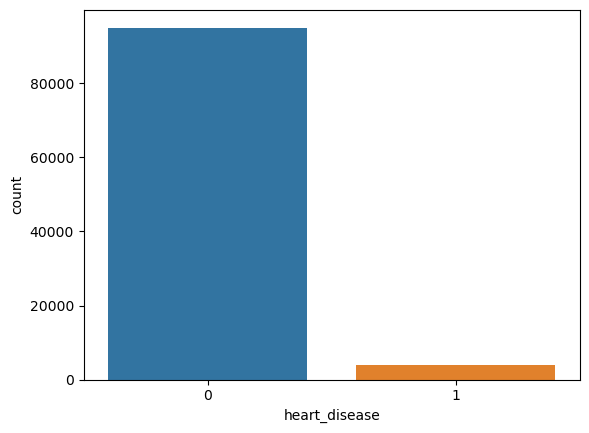

In [25]:
sns.countplot(diabetes['heart_disease'])

<AxesSubplot:xlabel='hypertension', ylabel='count'>

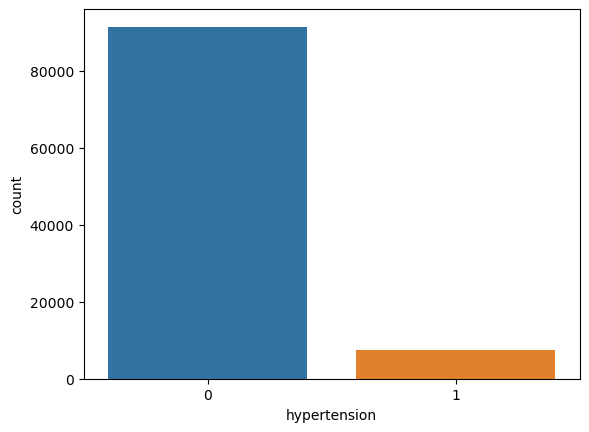

In [27]:
sns.countplot(diabetes['hypertension'])

<AxesSubplot:>

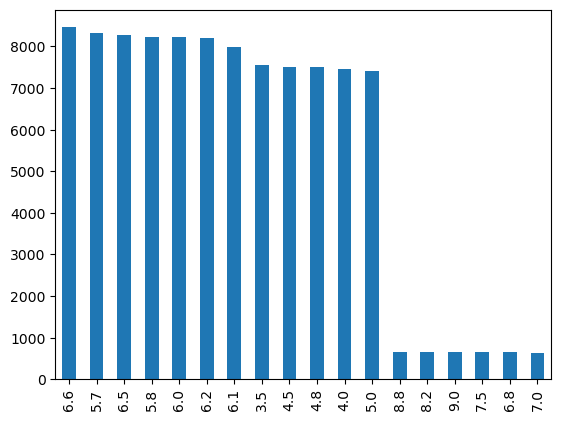

In [28]:
diabetes['HbA1c_level'].value_counts().plot(kind='bar')

<AxesSubplot:>

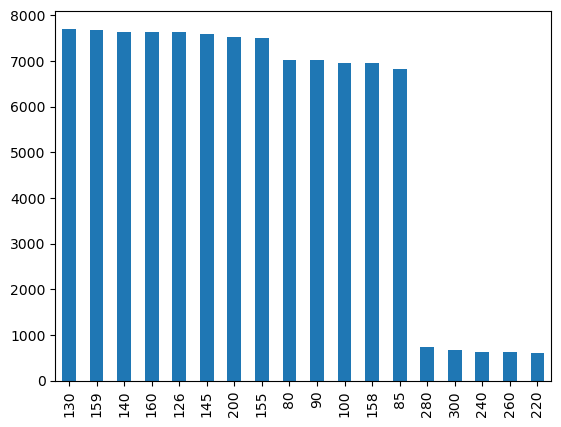

In [29]:
diabetes['blood_glucose_level'].value_counts().plot(kind='bar')

In [30]:
diabetes.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.250255,0.233598,0.319619,0.100600,0.110366,0.256850
hypertension,0.250255,1.000000,0.120757,0.145353,0.080875,0.084370,0.197125
heart_disease,0.233598,0.120757,1.000000,0.058942,0.067577,0.070049,0.171222
bmi,0.319619,0.145353,0.058942,1.000000,0.082067,0.090714,0.212654
HbA1c_level,0.100600,0.080875,0.067577,0.082067,1.000000,0.168252,0.402106
blood_glucose_level,0.110366,0.084370,0.070049,0.090714,0.168252,1.000000,0.420838
diabetes,0.256850,0.197125,0.171222,0.212654,0.402106,0.420838,1.000000


<AxesSubplot:>

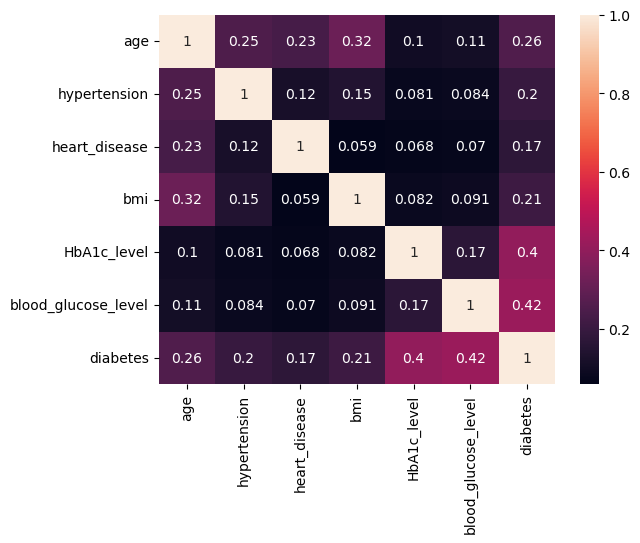

In [31]:
sns.heatmap(diabetes.corr(),annot=True)

In [32]:
corr=diabetes.corr()['diabetes'].reset_index()
corr.sort_values('diabetes',ascending=False)

,index,diabetes
6,diabetes,1.000000
5,blood_glucose_level,0.420838
4,HbA1c_level,0.402106
0,age,0.256850
3,bmi,0.212654
1,hypertension,0.197125
2,heart_disease,0.171222


<AxesSubplot:>

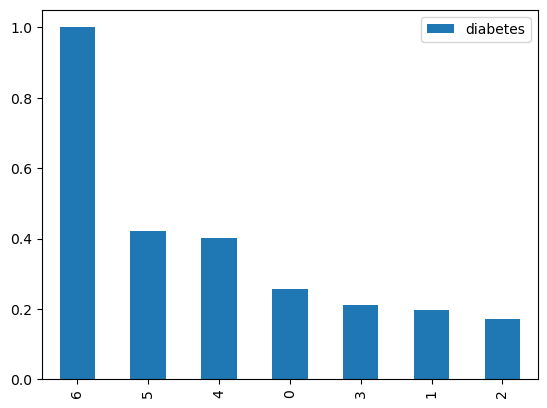

In [33]:
corr.sort_values('diabetes',ascending=False).plot(kind='bar')

# encoding


In [34]:
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}

In [35]:
diabetes['gender']=diabetes['gender'].map(gender_mapping)

In [36]:
smoking_mapping = {
    'never': 0,
    'No Info': 1,
    'current': 2,
    'former': 3,
    'ever': 4,
    'not current': 5  
}

In [37]:
diabetes['smoking_history']=diabetes['smoking_history'].map(smoking_mapping)

In [39]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80,0,0,1,27.32,6.2,90,0
99996,0,2,0,0,1,17.37,6.5,100,0
99997,1,66,0,0,3,27.83,5.7,155,0
99998,0,24,0,0,0,35.42,4.0,100,0


In [40]:
diabetes.dtypes

gender                   int64
age                      int32
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

# split training and testing data

In [41]:
X=diabetes.drop(['diabetes'],axis=1)
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80,0,1,0,25.19,6.6,140
1,0,54,0,0,1,27.32,6.6,80
2,1,28,0,0,0,27.32,5.7,158
3,0,36,0,0,2,23.45,5.0,155
4,1,76,1,1,2,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80,0,0,1,27.32,6.2,90
99996,0,2,0,0,1,17.37,6.5,100
99997,1,66,0,0,3,27.83,5.7,155
99998,0,24,0,0,0,35.42,4.0,100


In [42]:
y=diabetes['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 99006, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
Xtrain.shape,Xtest.shape

((79204, 8), (19802, 8))

In [45]:
ytrain.shape,ytest.shape

((79204,), (19802,))

# scaling

In [47]:
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
Xtrain=se.fit_transform(Xtrain)
Xtest=se.fit_transform(Xtest)

# Training models

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import  XGBClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [49]:
knn=KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression()
dt=DecisionTreeClassifier()
ra=RandomForestClassifier()
ad=AdaBoostClassifier()
svm=SVC(probability=True)
gau=GaussianNB()
bag=BaggingClassifier()
Gr=GradientBoostingClassifier()
xg= XGBClassifier()

In [50]:
Training_score= []
Testing_score= []
def model_building(model):
    model.fit(Xtrain, ytrain)
    ytrain_pred= model.predict(Xtrain)
    ytest_pred= model.predict(Xtest)
    a= accuracy_score(ytrain, ytrain_pred)
    b= accuracy_score(ytest, ytest_pred)
    Training_score.append(a)
    Testing_score.append(b)
    print(model)
    print("Train Data\n", accuracy_score(ytrain,ytrain_pred))
    print("Test Data\n", accuracy_score(ytest,ytest_pred))

In [51]:
def roc_auc_curve(model):
    print("ROC-AUC CURVE:")
    ytest_prob= model.predict_proba(Xtest)
    fpr,tpr,thresh=roc_curve(ytest,ytest_prob[:,1])
    print('roc_score')
    roc_score=roc_auc_score(ytest,ytest_prob[:,1])
    
    sns.lineplot(x=fpr,y=tpr)
    sns.lineplot(x=[0.0,1.0],y=[0.0,1.0],color="red",linestyle="--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC-AUC Curve")
    plt.show()
    print(roc_score)

In [52]:
from sklearn.metrics import log_loss

def calculate_logloss(model,ytest):
    print('log_loss:')
    ytest_prob= model.predict_proba(Xtest)

    logloss = log_loss(ytest, ytest_prob[:,-1])
    return logloss

KNeighborsClassifier(n_neighbors=3)
Train Data
 0.9739280844401798
Test Data
 0.9597010402989598
ROC-AUC CURVE:
roc_score


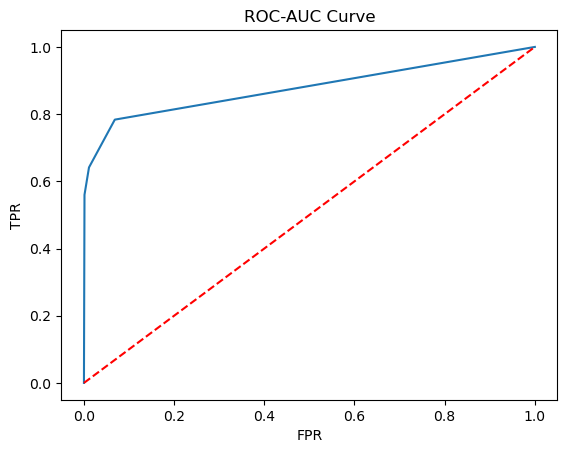

0.877886472670387
log_loss:


0.7117174406069102

In [53]:
model_building(knn)
roc_auc_curve(knn)
calculate_logloss(knn,ytest)

LogisticRegression()
Train Data
 0.9595096207262259
Test Data
 0.9607110392889607
ROC-AUC CURVE:
roc_score


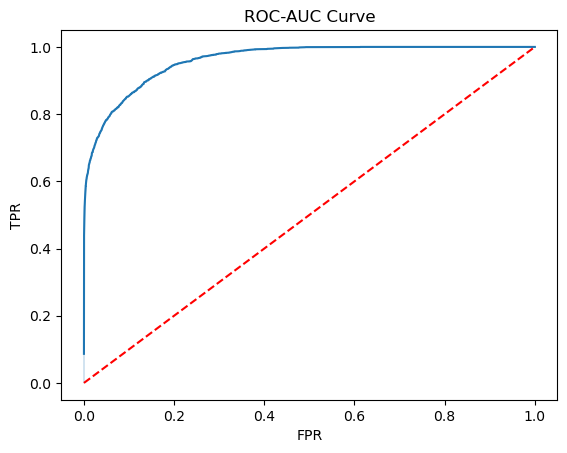

0.9610968709937731
log_loss:


0.11229922064405112

In [54]:
model_building(lr)
roc_auc_curve(lr)
calculate_logloss(lr,ytest)

DecisionTreeClassifier()
Train Data
 0.9992298368769255
Test Data
 0.94000605999394
ROC-AUC CURVE:
roc_score


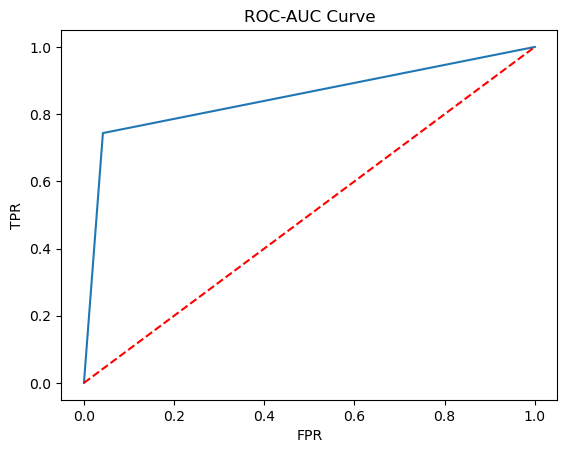

0.8507633764935636
log_loss:


2.072641459325093

In [55]:
model_building(dt)
roc_auc_curve(dt)
calculate_logloss(dt,ytest)

RandomForestClassifier()
Train Data
 0.999217211251957
Test Data
 0.9698515301484698
ROC-AUC CURVE:
roc_score


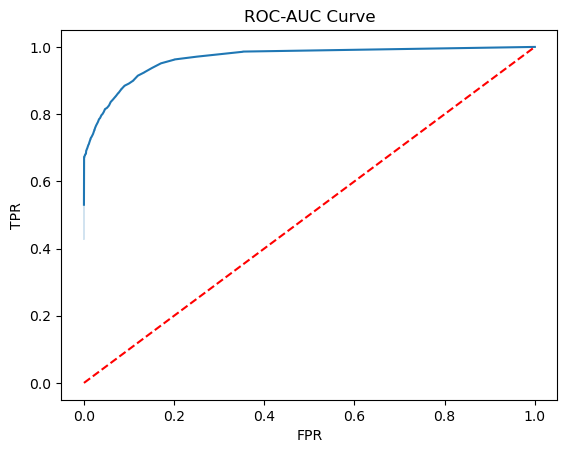

0.9656640465670274
log_loss:


0.12433519312026427

In [56]:
model_building(ra)
roc_auc_curve(ra)
calculate_logloss(ra,ytest)

AdaBoostClassifier()
Train Data
 0.9715039644462401
Test Data
 0.9724270275729724
ROC-AUC CURVE:
roc_score


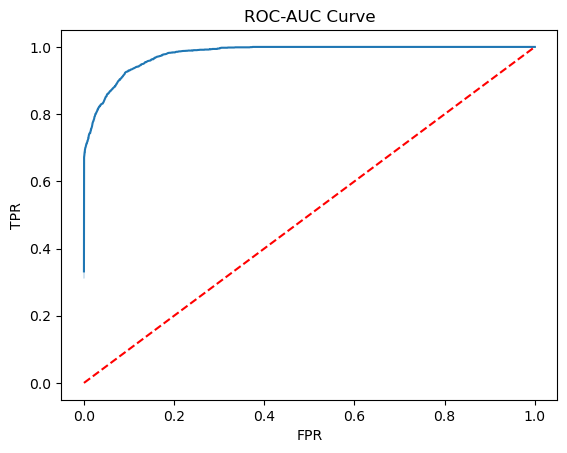

0.978912073419004
log_loss:


0.4596267933977405

In [57]:
model_building(ad)
roc_auc_curve(ad)

calculate_logloss(ad,ytest)


SVC(probability=True)
Train Data
 0.9637897075905257
Test Data
 0.9647510352489648
ROC-AUC CURVE:
roc_score


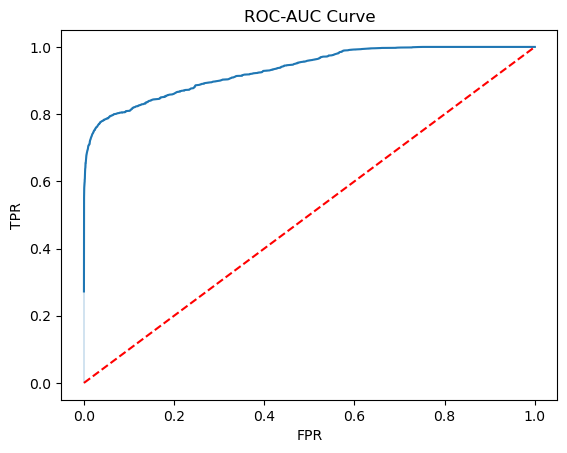

0.9321217179026831
log_loss:


0.11498096994057261

In [58]:
model_building(svm)
roc_auc_curve(svm)
calculate_logloss(svm,ytest)

GaussianNB()
Train Data
 0.9036033533659916
Test Data
 0.9037975962024039
ROC-AUC CURVE:
roc_score


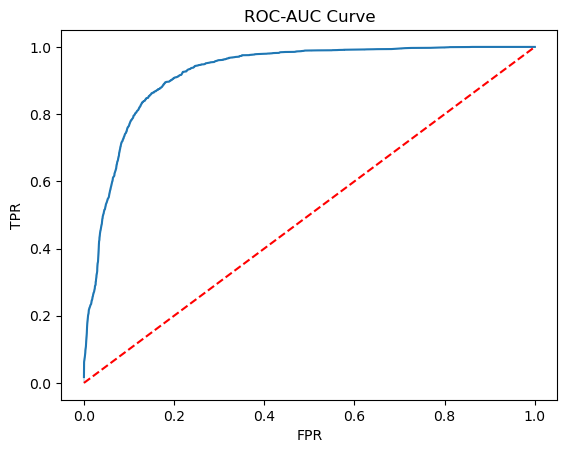

0.9218378359557753
log_loss:


0.4744216606919848

In [59]:
model_building(gau)
roc_auc_curve(gau)
calculate_logloss(gau,ytest)


BaggingClassifier()
Train Data
 0.995454775011363
Test Data
 0.9671750328249672
ROC-AUC CURVE:
roc_score


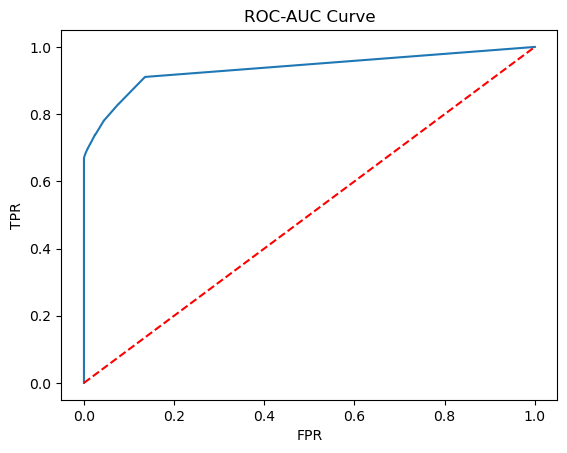

0.9355129666575933
log_loss:


0.3261777478016712

In [60]:
model_building(bag)
roc_auc_curve(bag)
calculate_logloss(bag,ytest)

GradientBoostingClassifier()
Train Data
 0.9720594919448513
Test Data
 0.9721745278254722
ROC-AUC CURVE:
roc_score


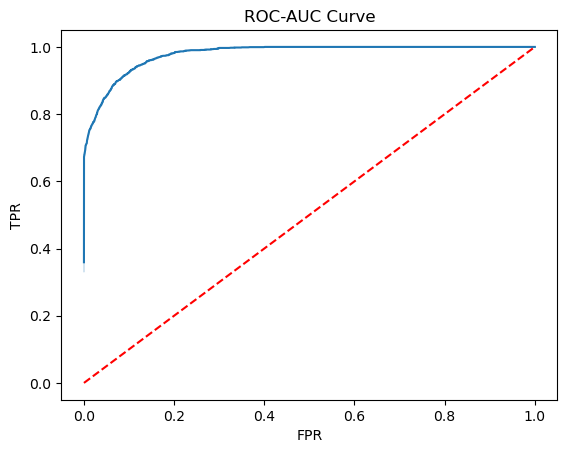

0.9787316535631785
log_loss:


0.08020270051473452

In [61]:
model_building(Gr)
roc_auc_curve(Gr)
calculate_logloss(Gr,ytest)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Train Data
 0.9754936619362659
Test Data
 0.9712150287849712
ROC-AUC CURVE:
roc_score


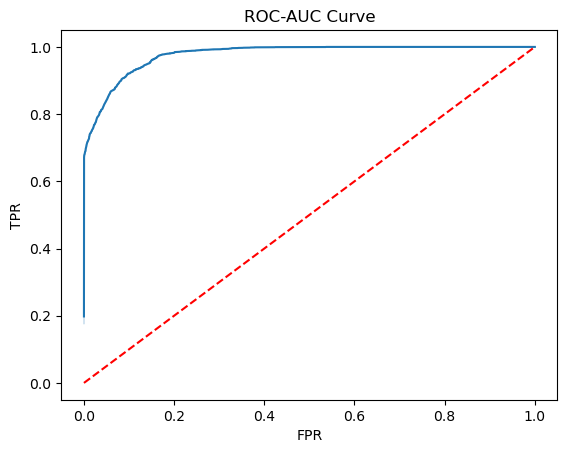

0.9770443848792579
log_loss:


0.08213258970702529

In [62]:
model_building(xg)
roc_auc_curve(xg)
calculate_logloss(xg,ytest)

In [63]:
knn_logloss=calculate_logloss(knn,ytest)
lr_logloss=calculate_logloss(lr,ytest)
dt_logloss=calculate_logloss(dt,ytest)
ra_logloss=calculate_logloss(ra,ytest)
ad_logloss=calculate_logloss(ad,ytest)
svm_logloss=calculate_logloss(svm,ytest)
gau_logloss=calculate_logloss(gau,ytest)
bag_logloss=calculate_logloss(bag,ytest)
Gr_logloss=calculate_logloss(Gr,ytest)
xg_logloss=calculate_logloss(xg,ytest)

log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:
log_loss:


In [64]:
Models= ["k-Nearest Neighbors","Logistic Regression" ,"Decision Tree Classifier", "Random forest Classifier" ,
        "Ada-Boosting Classifier","svm","GaussianNB","Bagging Classifier", "Gradiant- Bossting Classifier","XGB"]

In [65]:
score_diabetes = pd.DataFrame({"Algorithms":Models,
                   "Training Score":Training_score,
                   "Testing Score":Testing_score,
                           'Log Loss': [knn_logloss, lr_logloss, dt_logloss, ra_logloss, ad_logloss,svm_logloss,gau_logloss,bag_logloss,Gr_logloss,xg_logloss]})

In [66]:
score_diabetes

,Algorithms,Training Score,Testing Score,Log Loss
0,k-Nearest Neighbors,0.973928,0.959701,0.711717
1,Logistic Regression,0.959510,0.960711,0.112299
2,Decision Tree Classifier,0.999230,0.940006,2.072641
3,Random forest Classifier,0.999217,0.969852,0.124335
4,Ada-Boosting Classifier,0.971504,0.972427,0.459627
5,svm,0.963790,0.964751,0.114981
6,GaussianNB,0.903603,0.903798,0.474422
7,Bagging Classifier,0.995455,0.967175,0.326178
8,Gradiant- Bossting Classifier,0.972059,0.972175,0.080203
9,XGB,0.975494,0.971215,0.082133


Based  training and testing scores, the top 2 best-performing algorithms are:

Random Forest Classifier:
Training Score: 0.999217

Testing Score: 0.969852

Log Loss: 0.124335

Logistic Regression:
Training Score: 0.959510

Testing Score: 0.960711

Log Loss: 0.112299

# hypertuning

# Random forest

In [80]:
from sklearn.model_selection import RandomizedSearchCV
ra=RandomForestClassifier()
random_forest_params = {
    'n_estimators': [25,50,75,100],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy"],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}


In [81]:
ra_reg=RandomizedSearchCV(ra,param_distributions=random_forest_params,random_state=42,scoring='accuracy',cv=5,n_jobs=-1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [25, 50, 75, 100]},
                   random_state=42, scoring='accuracy')
Train Data
 0.9718574819453563
Test Data
 0.9721240278759721
ROC-AUC CURVE:
roc_score


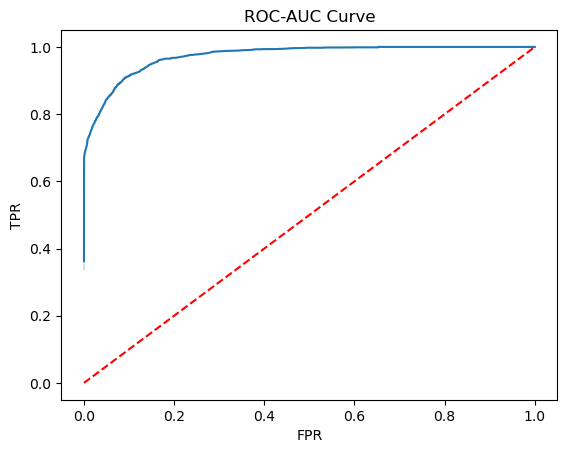

0.9734050069109725
log_loss:


0.089810396996568

In [82]:
model_building(ra_reg)
roc_auc_curve(ra_reg)
calculate_logloss(ra_reg,ytest)

# Logictics Regression

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid = {
    'C':np.arange(1,51),
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 200, 300],'class_weight':[None,'balanced']
}

In [85]:
lr_reg=GridSearchCV(lr,param_grid=param_grid,scoring='f1_macro',cv=5)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='f1_macro')
Train Data
 0.9595096207262259
Test Data
 0.9607110392889607
ROC-AUC CURVE:
roc_score


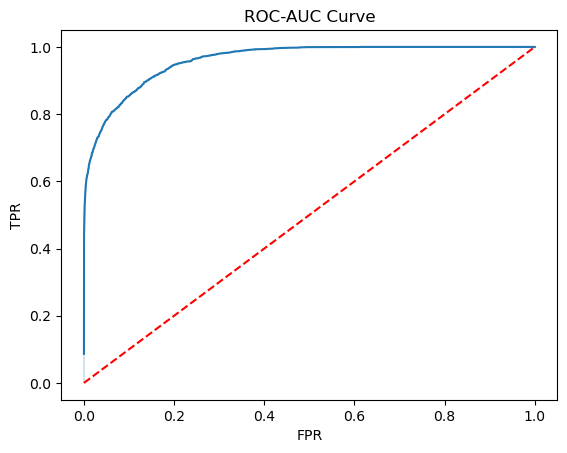

0.9610965719828712
log_loss:


0.11229937301144659

In [86]:
model_building(lr_reg)
roc_auc_curve(lr_reg)
calculate_logloss(lr_reg,ytest)

#### We chose a random forest as our best algorithm for diabetes

In [73]:
import pickle

In [88]:
pickle.dump(ra_reg,open("diabetesmodel2.pkl",'wb'))

In [78]:
pickle.dump(se,open('diabetesscaling2.pkl','wb'))